<a href="https://colab.research.google.com/github/gtndulbes/Pengolahan_Citra_Digital/blob/main/Citradigital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Gambar 'Lung(5).png' berhasil dibaca, memulai pemrosesan...


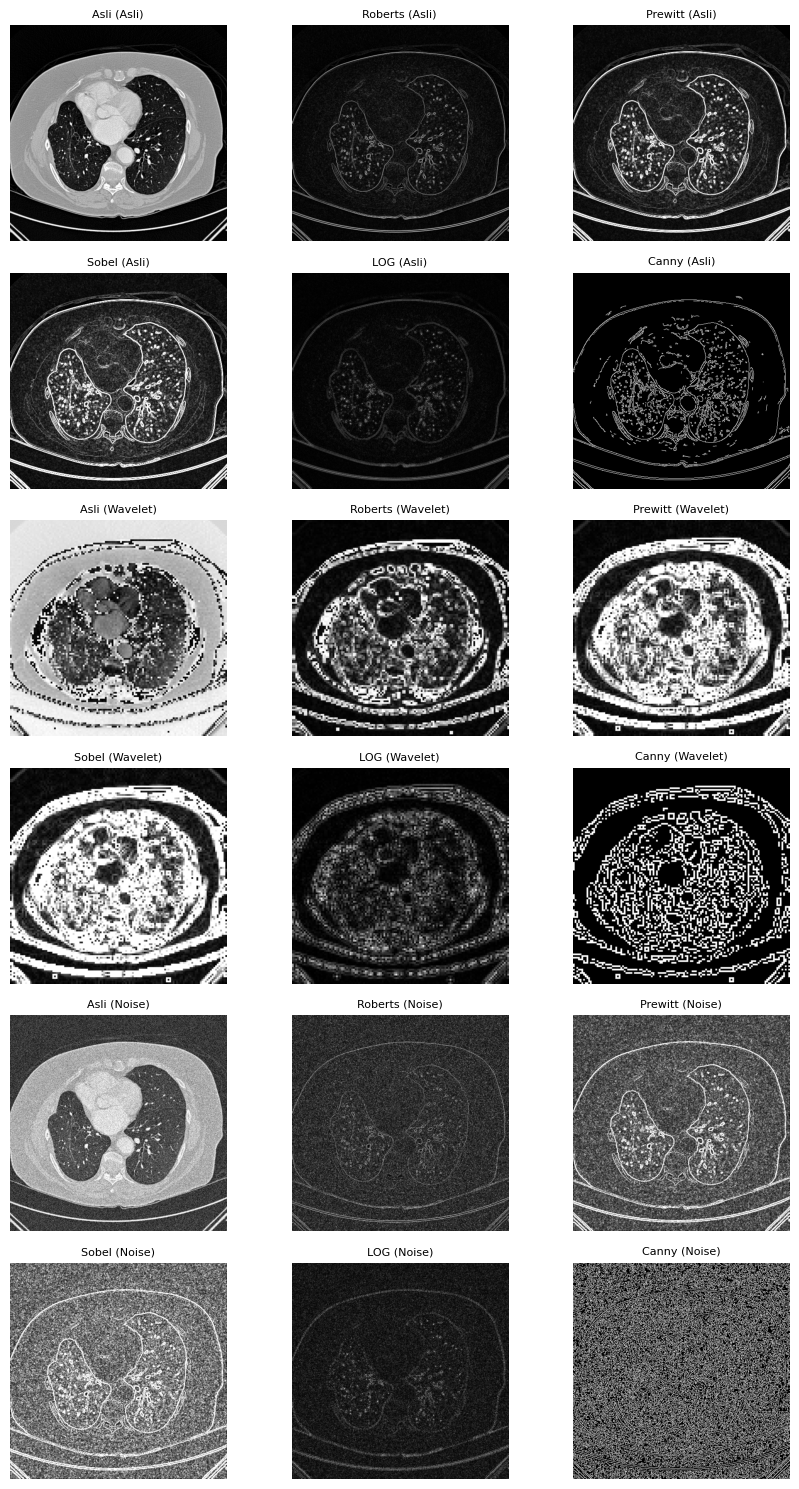

In [ ]:
# -------------------------------------------------
# 1. Instalasi dan Import Library
# -------------------------------------------------
!pip install opencv-python-headless matplotlib scikit-image pywavelets --quiet
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import pywt

# -------------------------------------------------
# 2. Baca Gambar dari File Lokal
# -------------------------------------------------
nama_file = 'Lung(5).png'  # pastikan file ini ada di folder kerja (Colab/files)
img = cv2.imread(nama_file)

if img is None:
    print(f"❌ Gagal membaca file gambar '{nama_file}'. Pastikan nama dan lokasinya benar.")
else:
    print(f"✅ Gambar '{nama_file}' berhasil dibaca, memulai pemrosesan...")

    # --- A. Konversi ke Grayscale ---
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # --- B. Wavelet Packet Decomposition ---
    coeffs = pywt.WaveletPacket2D(data=gray, wavelet='db1', mode='symmetric', maxlevel=2)
    wavelet_img = coeffs['aa'].data.astype(np.uint8)

    # --- C. Tambahkan Noise Gaussian ---
    noisy_img = (random_noise(gray, mode='gaussian', var=0.01) * 255).astype(np.uint8)

    # --- Kumpulan Citra Input ---
    input_images = [gray, wavelet_img, noisy_img]
    input_titles = ['Asli', 'Wavelet', 'Noise']

    # -------------------------------------------------
    # 3. Definisi Fungsi Deteksi Tepi
    # -------------------------------------------------
    def roberts(img):
        kx = np.array([[1, 0], [0, -1]], dtype=np.float32)
        ky = np.array([[0, 1], [-1, 0]], dtype=np.float32)
        gx = cv2.filter2D(img, cv2.CV_32F, kx)
        gy = cv2.filter2D(img, cv2.CV_32F, ky)
        mag = np.sqrt(gx**2 + gy**2)
        return cv2.convertScaleAbs(mag)

    def prewitt(img):
        kx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
        ky = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)
        gx = cv2.filter2D(img, cv2.CV_32F, kx)
        gy = cv2.filter2D(img, cv2.CV_32F, ky)
        mag = np.sqrt(gx**2 + gy**2)
        return cv2.convertScaleAbs(mag)

    def sobel(img):
        gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
        mag = np.sqrt(gx**2 + gy**2)
        return cv2.convertScaleAbs(mag)

    def log(img):
        blur = cv2.GaussianBlur(img, (3, 3), 0)
        lap = cv2.Laplacian(blur, cv2.CV_64F)
        return cv2.convertScaleAbs(lap)

    def canny(img):
        return cv2.Canny(img, 100, 200)

    operators = [
        ("Asli", lambda x: x),
        ("Roberts", roberts),
        ("Prewitt", prewitt),
        ("Sobel", sobel),
        ("LOG", log),
        ("Canny", canny)
    ]

    # -------------------------------------------------
    # 4. Proses Semua Kombinasi (3 kondisi × 6 metode)
    # -------------------------------------------------
    results = []
    titles = []

    for i, input_img in enumerate(input_images):
        for name, func in operators:
            out = func(input_img)
            results.append(out)
            titles.append(f"{name} ({input_titles[i]})")

    # -------------------------------------------------
    # 5. Visualisasi (18 gambar)
    # -------------------------------------------------
    plt.figure(figsize=(15, 9))
    for i in range(18):
        plt.subplot(6, 3, i+1)
        plt.imshow(results[i], cmap='gray')
        plt.title(titles[i], fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()
